# <b><span style='color:#F1A424'>AutoML - Binary Classification </span> </b>

## <b> Problem overview:</b>
    

**Dataset used - Breast Cancer Dataset**

**Features**:

- `ID number`
-  `Diagnosis` : (M = malignant, B = benign)

- Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

- The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

- All feature values are recoded with four significant digits.

- Missing attribute values: none


**Target Variable**:

- `diagnosis`: 357 benign, 212 malignant

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the type of cancer i.e., benign and malignant.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with customized train size i.e., 0.75.
- Outlier filteration and handling using method 'percentile' with customized upper and lower bound value. Use replacement value for features 'area_se' and 'radius_se' with 'delete' and 'median'.
- Feature scaling with method 'midrange'.



In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','breast_cancer')

In [5]:
# Fetching in teradata dataframe
cancer_df = DataFrame("breast_cancer")

In [6]:
# first 5 rows
cancer_df.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [7]:
# cancer_df dataset
cancer_df.shape

(569, 32)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
cancer_df_sample = cancer_df.sample(frac = [0.8, 0.2])

In [9]:
cancer_df_sample.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,sampleid
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472,1
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179,1
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368,1
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376,2
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486,1
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082,1
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789,1
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834,1
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019,1


In [10]:
# Fetching train and test data
cancer_df_train= cancer_df_sample[cancer_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
cancer_df_test = cancer_df_sample[cancer_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
cancer_df_train.shape

(455, 32)

In [12]:
# test data shape
cancer_df_test.shape

(114, 32)

In [13]:
#train dataset
cancer_df_train.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
86517,M,18.66,17.12,121.4,1077.0,0.1054,0.11,0.1457,0.08665,0.1966,0.06213,0.7128,1.581,4.895,90.47,0.008102,0.02101,0.03342,0.01601,0.02045,0.00457,22.25,24.9,145.4,1549.0,0.1503,0.2291,0.3272,0.1674,0.2894,0.08456
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [14]:
# test dataset
cancer_df_test.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
87163,M,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,0.05671,0.4697,1.147,3.142,43.4,0.006003,0.01063,0.02151,0.009443,0.0152,0.001868,17.98,29.87,116.6,993.6,0.1401,0.1546,0.2644,0.116,0.2884,0.07371
89869,B,14.76,14.74,94.87,668.7,0.08875,0.0778,0.04608,0.03528,0.1521,0.05912,0.3428,0.3981,2.537,29.06,0.004732,0.01506,0.01855,0.01067,0.02163,0.002783,17.27,17.93,114.2,880.8,0.122,0.2009,0.2151,0.1251,0.3109,0.08187
91505,B,12.54,16.32,81.25,476.3,0.1158,0.1085,0.05928,0.03279,0.1943,0.06612,0.2577,1.095,1.566,18.49,0.009702,0.01567,0.02575,0.01161,0.02801,0.00248,13.57,21.4,86.67,552.0,0.158,0.1751,0.1889,0.08411,0.3155,0.07538
91550,B,11.74,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.02639,0.1499,0.06758,0.1924,0.6417,1.345,13.04,0.006982,0.03916,0.04017,0.01528,0.0226,0.006822,12.45,17.6,81.25,473.8,0.1073,0.2793,0.269,0.1056,0.2604,0.09879
842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.0,0.0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0,0.0,0.2871,0.07039
87164,M,15.46,11.89,102.5,736.9,0.1257,0.1555,0.2032,0.1097,0.1966,0.07069,0.4209,0.6583,2.805,44.64,0.005393,0.02321,0.04303,0.0132,0.01792,0.004168,18.79,17.04,125.0,1102.0,0.1531,0.3583,0.583,0.1827,0.3216,0.101
87127,B,10.8,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.064,0.1728,0.4064,1.126,11.48,0.007809,0.009816,0.01099,0.005344,0.01254,0.00212,11.6,12.02,73.66,414.0,0.1436,0.1257,0.1047,0.04603,0.209,0.07699
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376


In [15]:
AutoClassifier.generate_custom_config("custom_breast_cancer")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  1,3,4



Customizing Train Test Split ...



Enter the train size for train test split:  0.75



Customization of train test split has been completed successfully.

Customizing Outlier Handling ...

Available outlier detection methods with corresponding indices:
Index 1: percentile
Index 2: tukey
Index 3: carling



Enter the corresponding index oulier handling method:  1

Enter the lower percentile value for outlier handling:  0.15

Enter the upper percentile value for outlier handling:  0.85

Enter the feature or list of features for outlier handling:  area_se,radius_se



Available outlier replacement methods with corresponding indices:
Index 1: delete
Index 2: median
Index 3: Any Numeric Value



Enter the index of corresponding replacement method for feature area_se:  1

Enter the index of corresponding replacement method for feature radius_se:  2



Customization of outlier handling has been completed successfully.

Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  3



Customization of feature scaling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  6



Customization of data preparation phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_breast_cancer.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoML instance
# Using all models from model training.
# Keeping early stopping timer threshold to 400 sec
# and verbose level 2 for detailed loggging

aml = AutoClassifier(max_runtime_secs=400, 
                     verbose=2,
                     custom_config_file='custom_breast_cancer.json')


 Received below input for customization : 
{
    "TrainTestSplitIndicator": true,
    "TrainingSize": 0.75,
    "OutlierFilterIndicator": true,
    "OutlierFilterMethod": "percentile",
    "OutlierLowerPercentile": 0.15,
    "OutlierUpperPercentile": 0.85,
    "OutlierFilterParam": {
        "area_se": {
            "replacement_value": "delete"
        },
        "radius_se": {
            "replacement_value": "median"
        }
    },
    "FeatureScalingIndicator": true,
    "FeatureScalingMethod": "midrange"
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 455
Total Columns in the data: 32

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
compactness_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
concave_points_se,FLOAT,455,0,None,12,443,0,0.0,100.0
perimeter_se,FLOAT,455,0,None,0,455,0,0.0,100.0
symmetry_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
radius_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
concavity_worst,FLOAT,455,0,None,12,443,0,0.0,100.0
smoothness_se,FLOAT,455,0,None,0,455,0,0.0,100.0
fractal_dimension_worst,FLOAT,455,0,None,0,455,0,0.0,100.0
concave_points_mean,FLOAT,455,0,None,12,443,0,0.0,100.0
diagnosis,VARCHAR(20) CHARACTER SET LATIN,455,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
50%,905189,13.2,18.89,85.79,538.9,0.096,0.09,0.059,0.033,0.18,0.061,0.319,1.083,2.235,24.2,0.006,0.02,0.025,0.011,0.019,0.003,14.85,25.45,97.33,674.7,0.131,0.212,0.222,0.099,0.282,0.079
count,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455
mean,30128885.248,14.127,19.222,91.945,656.286,0.096,0.104,0.087,0.049,0.182,0.063,0.404,1.227,2.857,40.041,0.007,0.025,0.031,0.012,0.02,0.004,16.273,25.588,107.288,883.274,0.132,0.254,0.269,0.114,0.29,0.084
min,8670,6.981,10.72,43.79,143.5,0.063,0.019,0,0,0.106,0.05,0.114,0.36,0.757,6.802,0.002,0.002,0,0,0.008,0.001,7.93,12.87,50.41,185.2,0.071,0.027,0,0,0.157,0.055
max,911320502,27.42,33.81,186.9,2501,0.163,0.311,0.427,0.201,0.304,0.097,2.547,4.885,18.65,542.2,0.023,0.135,0.396,0.053,0.061,0.03,36.04,42.79,251.2,4254,0.223,1.058,1.17,0.291,0.664,0.208
75%,8761505.5,16.1,21.64,106,799.4,0.105,0.13,0.122,0.074,0.197,0.066,0.497,1.477,3.392,44.825,0.008,0.032,0.04,0.015,0.023,0.004,19.19,29.255,127.2,1109.5,0.146,0.33,0.381,0.161,0.319,0.092
25%,868935,11.6,16.175,74.335,409.4,0.086,0.064,0.029,0.019,0.162,0.057,0.231,0.824,1.597,17.74,0.005,0.013,0.015,0.008,0.015,0.002,12.89,21.14,83.68,508.85,0.117,0.145,0.111,0.063,0.249,0.071
std,126995670.393,3.61,4.083,24.9,359.441,0.014,0.053,0.08,0.04,0.027,0.007,0.267,0.58,1.936,42.763,0.003,0.018,0.028,0.006,0.008,0.003,4.958,5.859,34.54,582.883,0.023,0.16,0.21,0.067,0.062,0.018



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
diagnosis                 2         

No Futile columns found.

Target Column Distribution:


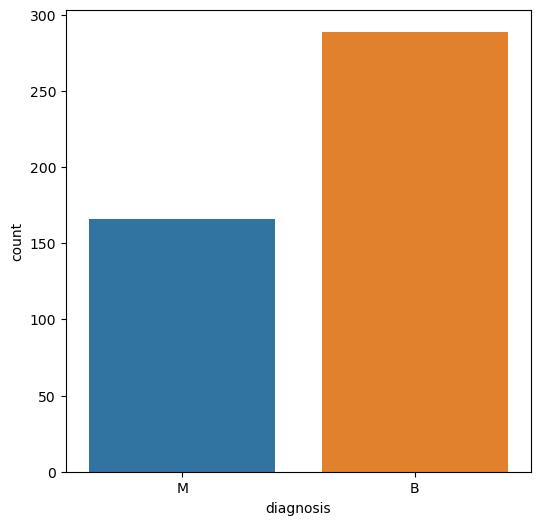

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
               ColumnName  OutlierPercentage
0           symmetry_mean           2.857143
1              texture_se           3.956044
2          symmetry_worst           3.736264
3        compactness_mean           2.857143
4             symmetry_se           5.274725
5          perimeter_mean           1.758242
6                      id          13.626374
7  fractal_dimension_mean           2.417582
8               area_mean           3.956044
9          concavity_mean           3.736264


Analysis complete. No action taken.                                                     


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171275680278285"'3


Dataset does not contain any feature related to dates.                                  


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


No Missing Values Detected.                                                              


No imputation is Required.                                                               


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 21% - 5/23


AutoML will proceed with default encoding technique.                                     


Encoding not required.                                                                   


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


No information provided for performing customized imbalanced dataset sampling. AutoML will Proceed with default option.


Training size : 0.75                                                                      
Testing size  : 0.25                                                                      


texture_worst,radius_worst,perimeter_mean,texture_mean,fractal_dimension_worst,concave_points_mean,concavity_mean,perimeter_worst,id,radius_mean,perimeter_se,smoothness_se,radius_se,compactness_se,fractal_dimension_se,area_se,area_mean,smoothness_worst,texture_se,area_worst,concave_points_se,concavity_se,smoothness_mean,compactness_worst,symmetry_worst,concave_points_worst,concavity_worst,symmetry_mean,compactness_mean,fractal_dimension_mean,symmetry_se,diagnosis
32.84,13.34,77.22,20.52,0.06878,0.0177,0.02383,84.58,14,12.18,1.183,0.00508,0.1924,0.006098,0.001532,14.68,458.7,0.1123,1.571,547.8,0.006797,0.01069,0.08013,0.08862,0.2694,0.07431,0.1145,0.1739,0.04038,0.05677,0.01447,0
19.14,16.97,106.3,16.07,0.0896,0.05397,0.06651,113.1,11,16.17,1.349,0.00451,0.1745,0.01812,0.003696,14.91,788.5,0.1235,0.489,861.5,0.01196,0.01951,0.0988,0.255,0.3153,0.1251,0.2114,0.199,0.1438,0.06572,0.01934,0
28.39,16.3,94.25,19.34,0.07463,0.02925,0.08817,108.1,45,14.53,1.994,0.004147,0.2535,0.02048,0.002327,23.04,659.7,0.1089,1.354,830.5,0.008848,0.03379,0.08388,0.2649,0.2471,0.09594,0.3779,0.1473,0.078,0.05746,0.01394,0
16.38,10.28,61.49,12.87,0.1252,0.05252,0.0973,69.05,9,9.268,3.014,0.009783,0.4076,0.04542,0.01045,20.04,248.7,0.1902,1.093,300.2,0.02188,0.03483,0.1634,0.3441,0.3038,0.1025,0.2099,0.2378,0.2239,0.09502,0.02542,0
23.4,10.06,60.07,18.9,0.1055,0.04908,0.1975,68.62,16,9.042,3.769,0.009845,0.4653,0.0659,0.007877,24.2,244.5,0.1221,1.911,297.1,0.02527,0.1027,0.09968,0.3748,0.3135,0.1145,0.4609,0.233,0.1972,0.08743,0.03491,0
25.2,14.99,95.54,25.2,0.05504,0.02899,0.02398,95.54,36,14.99,8.077,0.006883,1.214,0.01094,0.001754,106.0,698.8,0.09387,2.188,698.8,0.01917,0.01818,0.09387,0.05131,0.1565,0.02899,0.02398,0.1565,0.05131,0.05504,0.007882,1
24.7,19.76,117.4,21.84,0.06558,0.05778,0.1103,129.1,8,18.08,4.312,0.00553,0.6362,0.05296,0.005036,76.36,1024.0,0.08822,1.305,1228.0,0.01444,0.0611,0.07371,0.1963,0.2369,0.09181,0.2535,0.177,0.08642,0.0534,0.0214,1
39.42,25.74,140.1,29.33,0.124,0.152,0.3514,184.6,29,20.6,5.772,0.006522,0.726,0.06158,0.006185,86.22,1265.0,0.165,1.595,1821.0,0.01664,0.07117,0.1178,0.8681,0.4087,0.265,0.9387,0.2397,0.277,0.07016,0.02324,1
27.65,23.17,102.9,21.08,0.1048,0.08481,0.1522,157.1,15,15.5,9.424,0.008198,1.37,0.03889,0.005815,176.5,803.1,0.1517,1.213,1748.0,0.02139,0.04493,0.112,0.4002,0.3003,0.2134,0.4211,0.2085,0.1571,0.06864,0.02018,1
21.18,11.87,63.76,15.11,0.07697,0.002404,0.001597,75.39,53,10.08,2.68,0.01439,0.4245,0.012,0.00347,26.43,317.5,0.1521,1.268,437.0,0.002404,0.001597,0.09267,0.1019,0.2933,0.01042,0.00692,0.1703,0.04695,0.06048,0.02538,0


texture_worst,radius_worst,perimeter_mean,texture_mean,fractal_dimension_worst,concave_points_mean,concavity_mean,perimeter_worst,id,radius_mean,perimeter_se,smoothness_se,radius_se,compactness_se,fractal_dimension_se,area_se,area_mean,smoothness_worst,texture_se,area_worst,concave_points_se,concavity_se,smoothness_mean,compactness_worst,symmetry_worst,concave_points_worst,concavity_worst,symmetry_mean,compactness_mean,fractal_dimension_mean,symmetry_se,diagnosis
26.44,12.41,70.92,16.83,0.07881,0.0248,0.03046,79.93,17,11.04,1.342,0.005158,0.1967,0.009355,0.002198,13.54,373.2,0.1369,1.387,471.4,0.007483,0.01056,0.1077,0.1482,0.2998,0.07431,0.1067,0.1714,0.07804,0.0634,0.01718,0
19.29,13.13,78.78,14.09,0.08824,0.02534,0.06839,87.65,21,12.21,2.097,0.004405,0.2666,0.03026,0.004622,19.96,462.0,0.1026,0.8309,529.9,0.01087,0.04344,0.08108,0.2431,0.2677,0.0914,0.3076,0.1646,0.07823,0.06154,0.01921,0
18.91,22.39,120.2,16.15,0.1108,0.108,0.1684,150.1,24,18.05,6.311,0.00794,0.9806,0.05839,0.007054,134.8,1006.0,0.1478,0.5505,1610.0,0.0207,0.04658,0.1065,0.5634,0.3751,0.2102,0.3786,0.2152,0.2146,0.06673,0.02591,1
20.43,16.76,98.73,16.74,0.08549,0.06142,0.07721,109.7,20,15.04,2.304,0.004123,0.372,0.01819,0.003237,34.84,689.4,0.1135,0.8423,856.9,0.01004,0.01996,0.09883,0.2176,0.2177,0.1018,0.1856,0.1668,0.1364,0.06869,0.01055,0
33.17,24.09,128.3,24.81,0.1038,0.09961,0.2107,177.4,10,19.07,8.83,0.006548,0.9811,0.1006,0.007646,104.9,1104.0,0.1247,1.666,1651.0,0.02638,0.09723,0.09081,0.7444,0.467,0.2493,0.7242,0.231,0.219,0.06343,0.05333,1
28.18,28.19,147.3,20.99,0.08858,0.1088,0.2195,195.9,26,21.75,8.867,0.005687,1.167,0.0496,0.004614,156.8,1491.0,0.1272,1.352,2384.0,0.01561,0.06329,0.09401,0.4725,0.2833,0.1841,0.5807,0.1721,0.1961,0.06194,0.01924,1
29.33,21.58,111.6,22.07,0.0757,0.06527,0.09061,140.5,18,17.19,2.819,0.004493,0.4203,0.01206,0.001575,45.42,928.3,0.1558,0.7383,1436.0,0.009875,0.02048,0.09726,0.2567,0.3216,0.1984,0.3889,0.1867,0.08995,0.0558,0.01144,1
26.56,19.18,107.1,20.2,0.07623,0.02307,0.03649,127.3,30,16.69,1.775,0.002667,0.2473,0.01446,0.0017,22.95,857.6,0.1009,0.5679,1084.0,0.005297,0.01423,0.07497,0.292,0.4677,0.08737,0.2477,0.1846,0.07112,0.05325,0.01961,1
25.09,19.85,113.0,17.08,0.08113,0.08353,0.1266,130.9,23,17.3,2.193,0.004757,0.3093,0.01503,0.002362,33.63,928.2,0.1416,0.8568,1222.0,0.01262,0.02332,0.1008,0.2405,0.3138,0.1857,0.3378,0.1813,0.1041,0.05613,0.01394,1
27.21,13.05,76.39,21.17,0.07351,0.02179,0.02555,85.09,27,11.89,1.93,0.009895,0.2747,0.03053,0.002272,19.53,433.8,0.1426,1.203,522.9,0.009276,0.0163,0.09773,0.2187,0.3075,0.08263,0.1164,0.2019,0.0812,0.0629,0.02258,0


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
                ColumnName  OutlierPercentage
0             radius_worst           9.670330
1  fractal_dimension_worst           9.670330
2          perimeter_worst           9.670330
3                radius_se           9.450549
4     fractal_dimension_se           9.670330
5               area_worst           9.670330
6            texture_worst           9.670330
7             perimeter_se           9.670330
8             texture_mean           9.670330
9         compactness_mean           9.

['texture_worst', 'symmetry_worst', 'concave_points_worst', 'concavity_worst', 'perimeter_worst', 'area_se', 'area_mean', 'texture_se', 'perimeter_mean', 'radius_mean', 'perimeter_se', 'texture_mean', 'area_worst']


['texture_worst', 'symmetry_worst', 'concave_points_worst', 'concavity_worst', 'perimeter_worst', 'area_se', 'area_mean', 'texture_se', 'perimeter_mean', 'radius_mean', 'perimeter_se', 'texture_mean', 'area_worst']


id,diagnosis,texture_worst,symmetry_worst,concave_points_worst,concavity_worst,perimeter_worst,area_se,area_mean,texture_se,perimeter_mean,radius_mean,perimeter_se,texture_mean,area_worst
430,1,0.06400839454354688,-0.2292706105963412,0.46124698587667934,-0.050769230769230685,0.34670663284912756,0.10437912417516493,-0.24214832409606757,-0.571801335633099,-0.01875225387666772,-6.410667350456244e-05,0.055524708495280455,-0.22858411007545518,0.0419381481141599
125,1,-0.4655473941937739,-0.4464243288191968,0.35446090251464,-0.3121367521367521,0.5004227192375682,-0.45250949810037977,0.6041171813143309,-0.5815311131750033,0.6826541651640824,0.7538303737419068,-0.5741254858411993,-0.6608965823346651,0.20345049096081494
95,0,-0.16754109828611374,-0.6341173675457352,-0.6424388563554944,-0.8188034188034188,-0.3171931442625472,-0.7892421515696859,-0.46964898390076554,-0.6447746671973819,-0.31013342949873784,-0.2436694659914096,-0.7751249305941144,-0.41766533510874404,-0.526934018537212
284,1,0.026232948583421026,-0.6502732240437158,0.3751291767137444,-0.11709401709401711,0.3697640458073937,0.8640271945610879,0.06901557139086825,-0.5125381451505904,0.28056256761630005,0.27046605551637953,0.3681288173237092,0.0696848646249442,0.11351748187574566
180,1,-0.49632738719832104,0.18840579710144933,0.7568033069238719,-0.34136752136752135,0.5050342018292215,0.9940011997600481,-0.0204539456320929,-0.7288045641501923,0.22646952758745043,0.21148791589204455,0.7776235424764021,-0.5454948956946296,0.13554189226392588
154,0,-0.5110178384050365,-0.4777856973152766,-0.3379262831553565,-0.6916239316239315,-0.5943432480209055,-0.8612277544491099,-0.6887041435735024,-0.7013842819866436,-0.5331770645510275,-0.5090710943009167,-0.7742920599666852,-0.6759875721260543,-0.7538772139120858
343,0,-0.5991605456453304,-0.13756236635780458,-0.272476748191526,-0.6169230769230769,-0.47244639151487205,-0.880223955208958,-0.5469780944840328,-0.8227411436911238,-0.3660295708618823,-0.32572600807744084,-0.9006107717934481,-0.5792276964047938,-0.667982013398183
240,0,-0.302553340328786,-0.4564029460679497,-0.4426455390974854,-0.3957264957264957,-0.5290139113058183,-0.9820035992801439,-0.6269464238585379,-0.8084560612091459,-0.4322033898305084,-0.41932175139431993,-0.9687118267629095,-0.22237017310253018,-0.7323116454069927
170,0,-0.09758656873032501,-0.1294844381088144,-0.21598346538064073,-0.5203418803418803,-0.5125662900622551,-0.8044391121775644,-0.6545262602269729,-0.4691964088275618,-0.4709700685178507,-0.4616321559074298,-0.6629650194336478,-0.3723923657345761,-0.7177204735248233
56,1,-0.16054564533053503,-0.2829650748396293,0.040303134688253486,-0.3574358974358974,0.3482437937130119,0.113377324535093,0.16336764317761937,-0.7524656140816417,0.3130183916336097,0.36149753189307005,-0.3489727928928372,-0.1744340878828232,0.16490777278149954


id,diagnosis,texture_worst,symmetry_worst,concave_points_worst,concavity_worst,perimeter_worst,area_se,area_mean,texture_se,perimeter_mean,radius_mean,perimeter_se,texture_mean,area_worst
355,1,-0.18572927597061892,-0.3523402233309574,0.335859455735446,-0.4003418803418803,0.30674045038813313,-0.419116176764647,0.030878859857482156,-0.7941709787271681,0.21024161557879545,0.26277325469581386,-0.38506385341476945,-0.28628495339547283,-0.06818390382674126
106,1,0.2500874431619449,-0.6659539082917557,0.5707888391319326,-0.24803418803418797,0.7479056183229574,0.4039192161567687,0.6014779625230932,-0.5585334571668656,0.6249549224666425,0.7192127700493625,0.018600777345918983,-0.17976031957390165,0.6503624850876388
17,0,-0.1437565582371456,-0.3190781658351151,-0.48811574233551497,-0.8176068376068376,-0.6089462762278073,-0.9628074385122974,-0.7323832145684878,-0.5470346291627969,-0.5863685539127297,-0.57061350086544,-0.8697945585785674,-0.5073235685752333,-0.7725979627420391
354,1,0.13256383350821987,-0.19173200285103345,0.419221495005167,0.01470085470085479,0.5280916147874877,0.12097580483903213,0.3151227236737925,-0.5377471142364336,0.4446447890371438,0.5063786140137191,-0.23431426985008325,-0.3306702174877942,0.3915756630265211
375,1,0.13046519762154613,-0.03730102162033748,-0.0031002411298656973,-0.11350427350427354,-0.05141803089693335,-0.7354529094181164,-0.3895486935866984,-0.7097872716819248,-0.17688424089433827,-0.15904865696518994,-0.5047196002220987,-0.07323568575233047,-0.4714141506836743
178,0,-0.9174536551241691,-0.7172725112853409,-0.3007233895969686,-0.7335042735042734,-0.3846745061870726,-0.3389322135572884,-0.4407495381367116,0.004909115032506253,-0.23674720519293171,-0.19879479453811136,-0.10660744031093822,-0.8322237017310254,-0.6056712856749564
51,0,-1.0069954529555787,-0.2682347350914706,-1.0,-1.0,-0.8149258319883177,-0.9884023195360927,-0.8441541303774084,-0.9410906196099244,-0.7609087630724845,-0.7375472786717097,-0.9042198778456413,-0.9387483355525966,-0.8905203266954207
304,0,-0.6236446309898566,-0.42361606082204795,-0.22218394764037203,-0.6051282051282051,-0.05602951348858653,-0.7970405918816236,-0.16917392451834265,-0.8786431382955199,0.01550667147493688,0.08327456888262087,-0.7623542476401998,-0.6822015090989793,-0.335321648160044
35,0,-0.34382651276670156,-0.6203373722974578,-0.6486393386152257,-0.8613675213675215,-0.2958266082545539,-0.8754249150169965,-0.4480073898126155,-0.7818318517535713,-0.2704652001442481,-0.21033399576895948,-0.8273181565796779,-0.4735907678650689,-0.5390474442507112
171,1,0.34802378454004906,-0.13613684960798292,0.18222528418877024,-0.3121367521367521,-0.11905310890784729,-0.5044991001799639,-0.5663763525996306,-0.6394675158108886,-0.37414352686620983,-0.36034361176998514,-0.4297612437534702,0.11495783399911212,-0.39001560062402496


['texture_worst', 'radius_worst', 'perimeter_mean', 'texture_mean', 'fractal_dimension_worst', 'concave_points_mean', 'concavity_mean', 'perimeter_worst', 'radius_mean', 'perimeter_se', 'radius_se', 'compactness_se', 'area_se', 'area_mean', 'smoothness_worst', 'texture_se', 'area_worst', 'concave_points_se', 'concavity_se', 'smoothness_mean', 'compactness_worst', 'symmetry_worst', 'concave_points_worst', 'concavity_worst', 'compactness_mean', 'fractal_dimension_mean', 'symmetry_se']


['r_texture_worst', 'r_radius_worst', 'r_perimeter_mean', 'r_texture_mean', 'r_fractal_dimension_worst', 'r_concave_points_mean', 'r_concavity_mean', 'r_perimeter_worst', 'r_radius_mean', 'r_perimeter_se', 'r_radius_se', 'r_compactness_se', 'r_area_se', 'r_area_mean', 'r_smoothness_worst', 'r_texture_se', 'r_area_worst', 'r_concave_points_se', 'r_concavity_se', 'r_smoothness_mean', 'r_compactness_worst', 'r_symmetry_worst', 'r_concave_points_worst', 'r_concavity_worst', 'r_compactness_mean', 'r_fractal_dimension_mean', 'r_symmetry_se']


diagnosis,id,r_texture_worst,r_radius_worst,r_perimeter_mean,r_texture_mean,r_fractal_dimension_worst,r_concave_points_mean,r_concavity_mean,r_perimeter_worst,r_radius_mean,r_perimeter_se,r_radius_se,r_compactness_se,r_area_se,r_area_mean,r_smoothness_worst,r_texture_se,r_area_worst,r_concave_points_se,r_concavity_se,r_smoothness_mean,r_compactness_worst,r_symmetry_worst,r_concave_points_worst,r_concavity_worst,r_compactness_mean,r_fractal_dimension_mean,r_symmetry_se
1,430,0.06400839454354688,0.29546865301055225,-0.01875225387666772,-0.22858411007545518,-0.38491803278688524,0.12469135802469133,-0.07935735150925029,0.34670663284912756,-6.410667350456244e-05,0.055524708495280455,0.5926115956900976,-0.423076923076923,0.10437912417516493,-0.24214832409606757,0.28005284015852044,-0.571801335633099,0.0419381481141599,-0.37878787878787873,-0.748989898989899,0.06045589692765137,-0.29368390414281575,-0.2292706105963412,0.46124698587667934,-0.050769230769230685,0.037149355572403446,-0.24561403508771906,-0.6044776119402987
1,125,-0.4655473941937739,0.44961721498034346,0.6826541651640824,-0.6608965823346651,-0.5842622950819673,0.5493827160493827,-0.059396299902628964,0.5004227192375682,0.7538303737419068,-0.5741254858411993,-0.4527107918590731,-0.47863247863247854,-0.45250949810037977,0.6041171813143309,-0.36591809775429335,-0.5815311131750033,0.20345049096081494,-0.49242424242424243,-0.8262626262626264,-0.2547076313181368,-0.5018919181139034,-0.4464243288191968,0.35446090251464,-0.3121367521367521,0.0015163002274450773,-0.4912280701754384,-0.6679104477611942
0,95,-0.16754109828611374,-0.2942271880819368,-0.31013342949873784,-0.41766533510874404,-0.9003278688524591,-0.8469135802469137,-0.9026290165530673,-0.3171931442625472,-0.2436694659914096,-0.7751249305941144,-0.7379852916025312,-0.9358974358974358,-0.7892421515696859,-0.46964898390076554,-0.5535006605019817,-0.6447746671973819,-0.526934018537212,-0.8106060606060606,-0.9464646464646465,-0.6630327056491575,-0.9051130299796257,-0.6341173675457352,-0.6424388563554944,-0.8188034188034188,-0.8400303260045486,-0.7807017543859649,-0.7947761194029851
1,284,0.026232948583421026,0.33374715497620516,0.28056256761630005,0.0696848646249442,-0.11606557377049194,0.23703703703703696,0.039922103213242514,0.3697640458073937,0.27046605551637953,0.3681288173237092,-0.5306995040191551,0.45299145299145305,0.8640271945610879,0.06901557139086825,-0.346103038309115,-0.5125381451505904,0.11351748187574566,-0.12500000000000003,-0.6671717171717171,-0.39742319127849357,-0.12447850975065508,-0.6502732240437158,0.3751291767137444,-0.11709401709401711,0.37225170583775585,0.030701754385965188,-0.6716417910447763
1,180,-0.49632738719832104,0.4040968342644319,0.22646952758745043,-0.5454948956946296,-0.3324590163934428,0.7296296296296296,0.08519961051606616,0.5050342018292215,0.21148791589204455,0.7776235424764021,-0.5306995040191551,-0.23717948717948714,0.9940011997600481,-0.0204539456320929,0.10039630118890353,-0.7288045641501923,0.13554189226392588,-0.09090909090909088,-0.8116161616161617,0.11199207135778004,-0.28669836033763485,0.18840579710144933,0.7568033069238719,-0.34136752136752135,0.5784685367702805,0.04824561403508789,-0.4328358208955225
0,154,-0.5110178384050365,-0.5890751086281814,-0.5331770645510275,-0.6759875721260543,-0.6970491803278689,-0.6382716049382716,-0.7891918208373905,-0.5943432480209055,-0.5090710943009167,-0.7742920599666852,-0.7441422951941167,-0.7863247863247863,-0.8612277544491099,-0.6887041435735024,-0.10568031704095124,-0.7013842819866436,-0.7538772139120858,-0.6174242424242425,-0.893939393939394,-0.2309217046580772,-0.745997865528282,-0.4777856973152766,-0.3379262831553565,-0.6916239316239315,-0.5549658832448823,-0.49561403508771923,-0.6679104477611942
0,343,-0.5991605456453304,-0.4763087109455825,-0.3660295708618823,-0.5792276964047938,-0.46491803278688537,-0.5839506172839506,-0.7000973709834468,-0.47244639151487205,-0.32572600807744084,-0.9006107717934481,-0.9042243885753377,-0.6217948

diagnosis,id,r_texture_worst,r_radius_worst,r_perimeter_mean,r_texture_mean,r_fractal_dimension_worst,r_concave_points_mean,r_concavity_mean,r_perimeter_worst,r_radius_mean,r_perimeter_se,r_radius_se,r_compactness_se,r_area_se,r_area_mean,r_smoothness_worst,r_texture_se,r_area_worst,r_concave_points_se,r_concavity_se,r_smoothness_mean,r_compactness_worst,r_symmetry_worst,r_concave_points_worst,r_concavity_worst,r_compactness_mean,r_fractal_dimension_mean,r_symmetry_se
1,355,-0.18572927597061892,0.21477343265052767,0.21024161557879545,-0.28628495339547283,-0.6891803278688524,-0.07530864197530875,-0.495618305744888,0.30674045038813313,0.26277325469581386,-0.38506385341476945,-0.2621857362750128,-0.49999999999999994,-0.419116176764647,0.030878859857482156,-0.11624834874504628,-0.7941709787271681,-0.06818390382674126,-0.48863636363636365,-0.8631313131313131,-0.46085232903865203,-0.38934704569709916,-0.3523402233309574,0.335859455735446,-0.4003418803418803,-0.23881728582259273,-0.793859649122807,-0.701492537313433
1,106,0.2500874431619449,0.7589488930271051,0.6249549224666425,-0.17976031957390165,-0.7481967213114755,0.42592592592592593,-0.23466407010710805,0.7479056183229574,0.7192127700493625,0.018600777345918983,0.6517872413203352,-0.6047008547008547,0.4039192161567687,0.6014779625230932,-0.1334214002642008,-0.5585334571668656,0.6503624850876388,-0.4431818181818182,-0.838888888888889,-0.3201189296333003,-0.45124672552634154,-0.6659539082917557,0.5707888391319326,-0.24803418803418797,-0.2562547384382107,-0.7192982456140351,-0.91044776119403
0,17,-0.1437565582371456,-0.6139044072004967,-0.5863685539127297,-0.5073235685752333,-0.6878688524590165,-0.6938271604938271,-0.8515092502434275,-0.6089462762278073,-0.57061350086544,-0.8697945585785674,-0.947665469471524,-0.8482905982905983,-0.9628074385122974,-0.7323832145684878,-0.13210039630118903,-0.5470346291627969,-0.7725979627420391,-0.7159090909090909,-0.9464646464646465,-0.10406342913775998,-0.7654021538760067,-0.3190781658351151,-0.48811574233551497,-0.8176068376068376,-0.5557240333586049,-0.4210526315789473,-0.6529850746268658
1,354,0.13256383350821987,0.5810055865921787,0.4446447890371438,-0.3306702174877942,-0.5396721311475411,0.4740740740740741,0.09834469328140212,0.5280916147874877,0.5063786140137191,-0.23431426985008325,0.315204378313665,-0.4444444444444444,0.12097580483903213,0.3151227236737925,0.059445178335535066,-0.5377471142364336,0.3915756630265211,-0.553030303030303,-0.7848484848484849,-0.08027750247770066,-0.33016396623653843,-0.19173200285103345,0.419221495005167,0.01470085470085479,-0.049279757391963434,-0.5175438596491228,-0.6529850746268658
1,375,0.13046519762154613,-0.25387957790192434,-0.17688424089433827,-0.07323568575233047,-0.3914754098360656,-0.30864197530864196,-0.35783836416747816,-0.05141803089693335,-0.15904865696518994,-0.5047196002220987,-0.6422096801778691,-0.40811965811965806,-0.7354529094181164,-0.3895486935866984,-0.030383091149273407,-0.7097872716819248,-0.4714141506836743,-0.5606060606060607,-0.7570707070707071,-0.29236868186323095,-0.23061996701270995,-0.03730102162033748,-0.0031002411298656973,-0.11350427350427354,-0.3146322971948445,-0.5175438596491228,-0.5373134328358211
0,178,-0.9174536551241691,-0.38526794951375976,-0.23674720519293171,-0.8322237017310254,-0.7704918032786887,-0.18271604938271613,-0.5082765335929893,-0.3846745061870726,-0.19879479453811136,-0.10660744031093822,0.2474773388062255,-0.3547008547008546,-0.3389322135572884,-0.4407495381367116,-0.09907529722589178,0.004909115032506253,-0.6056712856749564,0.07954545454545459,-0.7595959595959596,0.23488602576808723,-0.7882992141263222,-0.7172725112853409,-0.3007233895969686,-0.7335042735042734,-0.40788476118271405,-0.3684210526315786,-0.6567164179104479
0,51,-1.0069954529555787,-0.7990895923856819,-0.7609087630724845,-0.9387483355525966,-0.6524590163934427,-1.0,-1.0,-0.8149258319883177,-0.7375472786717097,-0.9042198778456413,-0.9404822986146743,-0.9273504273504272,-0.9884023195360927,

['texture_worst', 'radius_worst', 'perimeter_mean', 'texture_mean', 'fractal_dimension_worst', 'concave_points_mean', 'concavity_mean', 'perimeter_worst', 'radius_mean', 'perimeter_se', 'smoothness_se', 'radius_se', 'compactness_se', 'fractal_dimension_se', 'area_se', 'area_mean', 'smoothness_worst', 'texture_se', 'area_worst', 'concave_points_se', 'concavity_se', 'smoothness_mean', 'compactness_worst', 'symmetry_worst', 'concave_points_worst', 'concavity_worst', 'symmetry_mean', 'compactness_mean', 'fractal_dimension_mean', 'symmetry_se']


diagnosis,id,texture_worst,radius_worst,perimeter_mean,texture_mean,fractal_dimension_worst,concave_points_mean,concavity_mean,perimeter_worst,radius_mean,perimeter_se,smoothness_se,radius_se,compactness_se,fractal_dimension_se,area_se,area_mean,smoothness_worst,texture_se,area_worst,concave_points_se,concavity_se,smoothness_mean,compactness_worst,symmetry_worst,concave_points_worst,concavity_worst,symmetry_mean,compactness_mean,fractal_dimension_mean,symmetry_se
1,94,0.12277019937040941,-0.2497413614732052,-0.3112152902993146,-0.0856635596981805,-0.7845992391446938,-0.7492592592592593,-0.8485881207400195,-0.26200906924909695,-0.2629014680428232,-0.805941143808995,-0.8437453258214089,-0.8046861638447067,-0.8126655841381079,-0.97296961154181,-0.8230353929214156,-0.4819213512800212,-0.4950802350921216,-0.794922825173588,-0.4821510507479122,-0.7393066868725137,-0.9297979797979798,-0.6211715730002975,-0.6565280243715497,-0.3209788548348776,-0.23389596968653123,-0.6435897435897435,-0.26868686868686853,-0.6897126828898492,-0.7525818501428257,-0.7790884318190302
0,301,-0.6467296257432668,-0.08731636664597571,-0.025964659213847774,-0.764758100310697,-0.7944378853469763,-0.26753086419753086,-0.6526290165530672,-0.08062408731073714,0.02814282966856873,-0.6948917268184341,-0.6505958019644014,-0.5543013511202327,-0.7244252627980516,-0.9008332987852908,-0.674865026994601,-0.21971496437054633,-0.32470448391996276,-0.7997877139445402,-0.35835551069101584,-0.5196059859821935,-0.9152525252525253,-0.3634651600753297,-0.6747678784527172,-0.44975053456878117,-0.05339304168101968,-0.7078632478632478,-0.2363636363636361,-0.4296110984762339,-0.6928147659854977,-0.6712083317779686
0,357,0.25638335082196567,-0.5414856196979103,-0.5342589253516046,-0.1398135818908125,-0.56093401547947,-0.724320987654321,-0.7764849074975657,-0.5382368764891247,-0.5180460285915763,-0.665741254858412,-0.1367602333349952,-0.50846587993843,-0.6836167848901804,-0.7871011428492461,-0.7412517496500698,-0.6950382686724731,0.11642342996764203,-0.19897395073194463,-0.7233183444984858,-0.715627959840879,-0.8693939393939394,-0.05461393596986805,-0.7277410716884479,-0.4312188168210976,-0.5778849466069584,-0.7,-0.21010101010100996,-0.4371920248654387,-0.12942210503186127,-0.6163350628989511
1,200,-0.17313746065057697,-0.29112352576039746,-0.27118644067796593,-0.15312916111850877,-0.31706677161222613,-0.32851851851851854,-0.4824732229795521,-0.18822534778264555,-0.2577729341624461,-0.8134369794558578,-0.6356384304731515,-0.891910381392167,-0.5697376292624563,-0.8416179539267306,-0.8632273545290942,-0.48693586698337293,0.18642276959651344,-0.8988987660873026,-0.5257410296411856,-0.5218791437772305,-0.8460101010101011,-0.22509663990484696,-0.2331305604874311,-0.4098360655737704,0.555632104719256,-0.14017094017094012,-0.3333333333333333,-0.19551209157759084,-0.3869479235332897,-0.7802082944492144
0,14,0.3039524309199025,-0.5176908752327748,-0.4727731698521456,-0.17976031957390165,-0.8197560015741835,-0.7814814814814814,-0.8839824732229796,-0.5374682960571825,-0.424450285274697,-0.9139367018323153,-0.6642568679264097,-0.9623738669403112,-0.917827536108025,-0.9559719746279176,-0.9400119976004798,-0.6195566112430722,-0.4567787096348146,-0.4656583079032329,-0.702486923006332,-0.7424891077855654,-0.946010101010101,-0.6507086926355435,-0.8809946541704262,-0.4635305298170587,-0.48804684808818466,-0.8042735042735043,-0.314141414141414,-0.8408005458267,-0.7130301032740058,-0.7540781664115869
0,391,0.6061559986009094,-0.606662528450238,-0.5214569058781103,0.12294718153572995,-0.5765446674537584,-0.49320987654320986,-0.45861733203505356,-0.5728229959265237,-0.5103532277710109,-0.7048861743475846,-0.35314354090841094,-0.8036599965794424,-0.41099051363131367,-0.7344499260671892,-0.8942211557688461,-0.6923990498812352,-0.22564881463382405,0.12387775861306445,-0.7700284481967513,-0.5199848456146997,-0.7102020202020203,-0.4033105362275747,-0.5645525899622591,-0.7400807792824898,-0.33496383052015155,-0.3

diagnosis,id,texture_worst,radius_worst,perimeter_mean,texture_mean,fractal_dimension_worst,concave_points_mean,concavity_mean,perimeter_worst,radius_mean,perimeter_se,smoothness_se,radius_se,compactness_se,fractal_dimension_se,area_se,area_mean,smoothness_worst,texture_se,area_worst,concave_points_se,concavity_se,smoothness_mean,compactness_worst,symmetry_worst,concave_points_worst,concavity_worst,symmetry_mean,compactness_mean,fractal_dimension_mean,symmetry_se
1,18,0.05841203217908365,0.3347817090833847,0.14713306887847089,-0.042166000887705404,-0.7289780926144562,-0.1941975308641976,-0.5588607594936709,0.3221120590269772,0.21789858324251582,-0.45974458634092163,-0.7227900483621678,-0.1828288010945784,-0.7904452610887959,-0.9530008429722373,-0.3253349330133972,0.00013196093956176967,0.1177441722247904,-0.8339303878643138,0.11259979810957148,-0.6258761129001705,-0.8965656565656566,-0.3111309346813361,-0.5548505399190851,-0.21549061534806366,0.3668618670341026,-0.3352136752136751,-0.18484848484848468,-0.4650140247138201,-0.7556580971215118,-0.867184292060174
1,10,0.3270374256733126,0.594454789985516,0.44825099170573407,0.20106524633821543,-0.3603568149022694,0.2297530864197531,0.025803310613437193,0.889324417800323,0.45893967562023225,1.209050527484731,-0.5178740589320436,1.7354198734393704,1.1012733954362874,-0.5335185108411757,0.8640271945610879,0.23198733174980202,-0.29300666974839834,-0.4236433594268277,0.30990180783701937,-0.0005682894487591459,-0.508939393939394,-0.4389929626325701,0.39148742129211883,0.47540983606557385,0.7175335859455735,0.23794871794871794,0.2626262626262629,0.5133045258130543,-0.42034717644473757,0.6965172272201278
1,26,-0.022035676810073294,1.0186219739292364,0.7908402452217816,-0.13803817132711968,-0.5600157418339236,0.3432098765432098,0.06864654333008764,1.173699177618938,0.8025514456054876,1.219322598556358,-0.6037293712918183,2.3713015221481104,0.01162293821040928,-0.7430178406091511,1.9018196360727855,0.7426761678543151,-0.2599881133196854,-0.5625138207067356,0.9825640084426907,-0.4086001136578897,-0.6803535353535353,-0.3755575379125781,-0.1361100600556899,-0.3974815870753148,0.2683430933517052,-0.0073504273504273005,-0.33232323232323213,0.3397013115002652,-0.4858272907053396,-0.5760200082123259
0,20,-0.564183280867436,-0.16387337057728116,-0.08492607284529378,-0.5153129161118511,-0.6005509641873279,-0.24172839506172838,-0.6240993184031158,-0.15133348704941973,-0.057760112827745354,-0.6027207107162688,-0.7596848980405843,-0.34804173080212075,-0.6594735492692932,-0.8381631496759394,-0.5368926214757047,-0.3151227236737927,-0.4409298025490323,-0.7879350758480386,-0.4188308708818941,-0.6196249289638188,-0.8991919191919192,-0.28000792942809,-0.6307205712567066,-0.7091945830363505,-0.2986565621770582,-0.6827350427350427,-0.3858585858585857,-0.112879993935259,-0.18918918918918934,-0.9004068834223002
0,17,-0.1437565582371456,-0.6139044072004967,-0.5863685539127297,-0.5073235685752333,-0.6881805063623245,-0.6938271604938271,-0.8517039922103212,-0.6089462762278073,-0.57061350086544,-0.8697945585785674,-0.6564790347509597,-0.947665469471524,-0.8482394667122468,-0.9099539820073795,-0.9628074385122974,-0.7323832145684878,-0.13187611437627939,-0.5470346291627969,-0.7725979627420391,-0.716499336995643,-0.9466666666666665,-0.1041728615323619,-0.7653850258559635,-0.3190781658351151,-0.48804684808818466,-0.8176068376068376,-0.3393939393939393,-0.5553028580092488,-0.4216655680070317,-0.6529172421516294
0,51,-1.0069954529555787,-0.7990895923856819,-0.7609087630724845,-0.9387483355525966,-0.6527613800341073,-1.0,-1.0,-0.8149258319883177,-0.7375472786717097,-0.9042198778456413,-0.5685296903824101,-0.9404822986146743,-0.9272711734039826,-0.8393377831212083,-0.9884023195360927,-0.8441541303774084,-0.3101763190913292,-0.9410906196099244,-0.8905203266954207,-1.0,-1.0,-0.40549112895232436,-0.9131666521135917,-0.2682347350914706,-1.0,-1.0,-0.1484848484848484,-0.8359487529376091,-0.3856295319709956,-0.44424950539400504
0,

['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


                                                                                          
Skipping customized hyperparameter tuning


response_column : diagnosis                                                                                                                           
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
Total number of models for decision_forest : 320
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : diagnosis
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
Total number of models for xgboost : 10240
---------------------------------------------------------------------------------------------

DECISIONFOREST_0                                                                                                                                                                                        
DECISIONFOREST_2                                                                          


XGBOOST_0                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


KNN_9                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


SVM_0                                                                                                                                                                                                   
SVM_1                                                                                     
SVM_2                                                                                     


GLM_0                                                                                                                                                                                                   
GLM_1                                                                                     
GLM_2                                                                                     


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,glm,pca,0.991228,0.991228,0.991228,0.991228,0.988372,0.993056,0.990621,0.991432,0.991228,0.991249
1,2,decision_forest,pca,0.982456,0.982456,0.982456,0.982456,0.977273,0.986111,0.981330,0.983254,0.982456,0.982537
2,3,glm,lasso,0.982456,0.982456,0.982456,0.982456,0.986486,0.976190,0.980956,0.982930,0.982456,0.982362
3,4,xgboost,pca,0.973684,0.973684,0.973684,0.973684,0.969702,0.974206,0.971863,0.973969,0.973684,0.973747
4,5,svm,lasso,0.973684,0.973684,0.973684,0.973684,0.969702,0.974206,0.971863,0.973969,0.973684,0.973747
5,6,svm,pca,0.973684,0.973684,0.973684,0.973684,0.969702,0.974206,0.971863,0.973969,0.973684,0.973747
6,7,knn,lasso,0.973684,0.973684,0.973684,0.973684,0.974106,0.969246,0.971583,0.973711,0.973684,0.973616
7,8,knn,pca,0.973684,0.973684,0.973684,0.973684,0.974106,0.969246,0.971583,0.973711,0.973684,0.973616
8,9,knn,rfe,0.964912,0.964912,0.964912,0.964912,0.958766,0.967262,0.962660,0.965858,0.964912,0.965073
9,10,decision_forest,lasso,0.956140,0.956140,0.956140,0.956140,0.960513,0.945437,0.952129,0.956869,0.956140,0.955776


In [17]:
# Fitting train data
aml.fit(cancer_df_train, cancer_df_train.diagnosis)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,glm,pca,0.991228,0.991228,0.991228,0.991228,0.988372,0.993056,0.990621,0.991432,0.991228,0.991249
1,2,decision_forest,pca,0.982456,0.982456,0.982456,0.982456,0.977273,0.986111,0.981330,0.983254,0.982456,0.982537
2,3,glm,lasso,0.982456,0.982456,0.982456,0.982456,0.986486,0.976190,0.980956,0.982930,0.982456,0.982362
3,4,xgboost,pca,0.973684,0.973684,0.973684,0.973684,0.969702,0.974206,0.971863,0.973969,0.973684,0.973747
4,5,svm,lasso,0.973684,0.973684,0.973684,0.973684,0.969702,0.974206,0.971863,0.973969,0.973684,0.973747
5,6,svm,pca,0.973684,0.973684,0.973684,0.973684,0.969702,0.974206,0.971863,0.973969,0.973684,0.973747
6,7,knn,lasso,0.973684,0.973684,0.973684,0.973684,0.974106,0.969246,0.971583,0.973711,0.973684,0.973616
7,8,knn,pca,0.973684,0.973684,0.973684,0.973684,0.974106,0.969246,0.971583,0.973711,0.973684,0.973616
8,9,knn,rfe,0.964912,0.964912,0.964912,0.964912,0.958766,0.967262,0.962660,0.965858,0.964912,0.965073
9,10,decision_forest,lasso,0.956140,0.956140,0.956140,0.956140,0.960513,0.945437,0.952129,0.956869,0.956140,0.955776


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,glm,pca,0.991228,0.991228,0.991228,0.991228,0.988372,0.993056,0.990621,0.991432,0.991228,0.991249


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [20]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

glm pca
Target Column Mapping:
M: 1
B: 0

 Prediction : 
   id  prediction      prob  diagnosis
0  21         0.0  0.999746          0
1  18         1.0  0.999975          1
2  22         0.0  0.996381          0
3  10         1.0  1.000000          1
4  25         0.0  0.998604          0
5  27         0.0  0.996902          0
6  20         0.0  0.892967          0
7  17         0.0  0.999275          0
8  23         1.0  0.998408          1
9  19         0.0  0.999981          0

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       71        0   1.000000  0.986111  0.993007       72
1               1  CLASS_2        1       42   0.976744  1.000000  0.988235       42

 ROC-AUC : 


AUC,GINI
0.9861111111111112,0.9722222222222223


threshold_value,tpr,fpr
0.04081632653061224,1.0,0.013888888888888888
0.08163265306122448,1.0,0.013888888888888888
0.1020408163265306,1.0,0.013888888888888888
0.12244897959183673,1.0,0.013888888888888888
0.16326530612244897,1.0,0.013888888888888888
0.18367346938775508,1.0,0.013888888888888888
0.14285714285714285,1.0,0.013888888888888888
0.061224489795918366,1.0,0.013888888888888888
0.02040816326530612,1.0,0.013888888888888888
0.0,1.0,1.0



 Confusion Matrix : 


array([[71,  1],
       [ 0, 42]], dtype=int64)

In [21]:
# Printing prediction
prediction.head()

id,prediction,prob,diagnosis
18,1.0,0.9999753794920933,1
20,0.0,0.892966992036803,0
21,0.0,0.9997463501469797,0
22,0.0,0.9963810880349019,0
24,1.0,0.9999981450606714,1
25,0.0,0.9986042549071102,0
23,1.0,0.9984083124397757,1
19,0.0,0.9999807529722886,0
17,0.0,0.9992748193803311,0
10,1.0,1.0,1


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [22]:
# Generating prediction and metrics on test data
prediction = aml.predict(cancer_df_test, 2)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...

Updated dataset after dropping irrelevent columns :


diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
B,14.03,21.25,89.79,603.4,0.0907,0.06945,0.01462,0.01896,0.1517,0.05835,0.2589,1.503,1.667,22.07,0.007389,0.01383,0.007302,0.01004,0.01263,0.002925,15.33,30.28,98.27,715.5,0.1287,0.1513,0.06231,0.07963,0.2226,0.07617
B,13.5,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,0.1365,0.05335,0.2244,0.6864,1.509,20.39,0.003338,0.003746,0.00203,0.003242,0.0148,0.001566,14.97,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.0221,0.2267,0.06192
M,20.73,31.12,135.7,1419.0,0.09469,0.1143,0.1367,0.08646,0.1769,0.05674,1.172,1.617,7.749,199.7,0.004551,0.01478,0.02143,0.00928,0.01367,0.002299,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
M,17.93,24.48,115.2,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,0.0551,0.4212,1.433,2.765,45.81,0.005444,0.01169,0.01622,0.008522,0.01419,0.002751,20.92,34.69,135.1,1320.0,0.1315,0.1806,0.208,0.1136,0.2504,0.07948
M,16.26,21.88,107.5,826.8,0.1165,0.1283,0.1799,0.07981,0.1869,0.06532,0.5706,1.457,2.961,57.72,0.01056,0.03756,0.05839,0.01186,0.04022,0.006187,17.73,25.21,113.7,975.2,0.1426,0.2116,0.3344,0.1047,0.2736,0.07953
B,12.9,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.03088,0.1778,0.06235,0.2143,0.7712,1.689,16.64,0.005324,0.01563,0.0151,0.007584,0.02104,0.001887,14.48,21.82,97.17,643.8,0.1312,0.2548,0.209,0.1012,0.3549,0.08118
B,14.64,15.24,95.77,651.9,0.1132,0.1339,0.09966,0.07064,0.2116,0.06346,0.5115,0.7372,3.814,42.76,0.005508,0.04412,0.04436,0.01623,0.02427,0.004841,16.34,18.24,109.4,803.6,0.1277,0.3089,0.2604,0.1397,0.3151,0.08473
M,16.35,23.29,109.0,840.4,0.09742,0.1497,0.1811,0.08773,0.2175,0.06218,0.4312,1.022,2.972,45.5,0.005635,0.03917,0.06072,0.01656,0.03197,0.004085,19.38,31.03,129.3,1165.0,0.1415,0.4665,0.7087,0.2248,0.4824,0.09614
M,16.11,18.05,105.1,813.0,0.09721,0.1137,0.09447,0.05943,0.1861,0.06248,0.7049,1.332,4.533,74.08,0.00677,0.01938,0.03067,0.01167,0.01875,0.003434,19.92,25.27,129.0,1233.0,0.1314,0.2236,0.2802,0.1216,0.2792,0.08158
M,15.3,25.27,102.4,732.4,0.1082,0.1697,0.1683,0.08751,0.1926,0.0654,0.439,1.012,3.498,43.5,0.005233,0.03057,0.03576,0.01083,0.01768,0.002967,20.27,36.71,149.3,1269.0,0.1641,0.611,0.6335,0.2024,0.4027,0.09876


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171276377714066"'

Updated dataset after performing target column transformation :


texture_worst,fractal_dimension_mean,radius_worst,perimeter_mean,texture_mean,fractal_dimension_worst,concave_points_mean,concavity_mean,perimeter_worst,id,radius_mean,perimeter_se,smoothness_se,radius_se,compactness_se,fractal_dimension_se,area_se,area_mean,smoothness_worst,texture_se,area_worst,concave_points_se,concavity_se,smoothness_mean,symmetry_worst,concave_points_worst,concavity_worst,symmetry_mean,compactness_mean,compactness_worst,symmetry_se,diagnosis
26.83,0.06322,10.76,63.95,19.4,0.0849,0.03029,0.06154,72.22,68,9.876,1.528,0.009058,0.1803,0.02196,0.00357,11.77,298.3,0.1559,1.222,361.2,0.01112,0.03029,0.1005,0.2622,0.09749,0.2644,0.1945,0.09697,0.2302,0.01609,0
27.06,0.06048,13.64,76.66,18.9,0.08083,0.008488,0.00751,86.54,124,12.06,1.559,0.00718,0.243,0.01096,0.002754,18.02,445.3,0.1289,1.152,562.6,0.005495,0.005832,0.08386,0.288,0.05093,0.04506,0.1555,0.05794,0.1352,0.01982,0
17.93,0.05912,17.27,94.87,14.74,0.08187,0.03528,0.04608,114.2,96,14.76,2.537,0.004732,0.3428,0.01506,0.002783,29.06,668.7,0.122,0.3981,880.8,0.01067,0.01855,0.08875,0.3109,0.1251,0.2151,0.1521,0.0778,0.2009,0.02163,0
23.21,0.05914,14.11,79.19,16.52,0.07609,0.02272,0.03372,89.71,71,12.31,1.74,0.004854,0.2505,0.01819,0.002304,19.68,470.9,0.1176,1.025,611.1,0.007965,0.01826,0.09172,0.2618,0.0866,0.1703,0.172,0.06829,0.1843,0.01386,0
25.63,0.06843,15.11,88.73,18.68,0.09031,0.03783,0.05385,99.43,67,13.71,2.284,0.006739,0.3191,0.02251,0.003747,26.45,571.0,0.1425,1.249,701.9,0.01352,0.02086,0.09916,0.2849,0.1284,0.1935,0.1714,0.107,0.2566,0.0187,0
21.82,0.06235,14.48,83.74,15.92,0.08118,0.03088,0.04894,97.17,22,12.9,1.689,0.005324,0.2143,0.01563,0.001887,16.64,512.2,0.1312,0.7712,643.8,0.007584,0.0151,0.08677,0.3549,0.1012,0.209,0.1778,0.09509,0.2548,0.02104,0
30.37,0.05884,9.456,47.92,24.54,0.07039,0.0,0.0,59.16,65,7.76,2.548,0.007189,0.3857,0.00466,0.002783,19.15,181.0,0.08996,1.428,268.6,0.0,0.0,0.05263,0.2871,0.0,0.0,0.1587,0.04362,0.06444,0.02676,0
36.91,0.05294,17.26,96.71,29.81,0.06165,0.02739,0.04686,110.1,33,15.13,3.043,0.006831,0.4681,0.01427,0.00175,45.38,719.5,0.1148,1.627,931.4,0.009087,0.02489,0.0832,0.3233,0.06575,0.1547,0.1852,0.04605,0.09866,0.03151,1
15.98,0.06402,15.7,94.28,10.89,0.08006,0.05778,0.08842,102.8,21,14.5,1.928,0.003818,0.2929,0.01276,0.002808,24.19,640.7,0.1313,0.857,745.5,0.012,0.02882,0.1101,0.2889,0.1221,0.256,0.1856,0.1099,0.1788,0.0191,0
17.33,0.07871,25.38,122.8,10.38,0.1189,0.1471,0.3001,184.6,25,17.99,8.589,0.006399,1.095,0.04904,0.006193,153.4,1001.0,0.1622,0.9053,2019.0,0.01587,0.05373,0.1184,0.4601,0.2654,0.7119,0.2419,0.2776,0.6656,0.03003,1


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171280680753147"'

Updated dataset after performing Lasso feature selection:


id,texture_worst,symmetry_worst,concave_points_worst,concavity_worst,perimeter_worst,area_se,area_mean,texture_se,perimeter_mean,radius_mean,perimeter_se,texture_mean,area_worst,diagnosis
73,23.41,0.275,0.186,0.2416,158.8,74.08,1326.0,0.7339,132.9,20.57,3.398,17.77,1956.0,1
48,28.07,0.1603,0.1099,0.2803,120.4,58.53,948.0,1.667,114.5,17.42,3.767,25.56,1021.0,1
53,45.41,0.2713,0.1625,0.3995,180.2,109.9,1223.0,1.321,128.0,19.53,4.722,32.47,2477.0,1
76,29.66,0.3585,0.2051,0.5106,113.3,33.67,556.7,0.9306,88.64,13.4,3.093,20.52,844.4,1
106,22.4,0.3147,0.1986,0.6376,106.4,34.66,530.2,0.9238,87.21,13.11,2.41,15.56,827.2,1
25,17.33,0.4601,0.2654,0.7119,184.6,153.4,1001.0,0.9053,122.8,17.99,8.589,10.38,2019.0,1
52,18.99,0.2758,0.0111,0.005,77.37,17.09,396.6,1.28,71.79,11.33,1.565,14.16,458.0,0
35,29.72,0.3322,0.0788,0.5381,58.08,10.21,203.9,1.962,53.27,8.219,1.243,20.7,249.8,0
36,21.06,0.1988,0.083,0.1901,90.72,30.57,508.3,1.265,83.05,12.8,2.668,17.46,591.0,0
124,27.06,0.288,0.0509,0.0451,86.54,18.02,445.3,1.152,76.66,12.06,1.559,18.9,562.6,0



Updated dataset after performing scaling on Lasso selected features :


id,diagnosis,texture_worst,symmetry_worst,concave_points_worst,concavity_worst,perimeter_worst,area_se,area_mean,texture_se,perimeter_mean,radius_mean,perimeter_se,texture_mean,area_worst
73,1,-0.3557187827911855,-0.43692088382038474,0.2814330003444712,-0.5870085470085469,0.6034124971178236,0.247750449910018,0.5249406175771971,-0.8358763433726947,0.5311936530833034,0.6512596961343677,-0.29900055524708485,-0.42387927208166903,0.5897953565201431
48,1,-0.029730675061210014,-0.981943454502257,-0.24285222183947644,-0.5208547008547009,0.01314272538621173,-0.06318736252749442,0.026128266033254098,-0.4232010968112865,0.1994230075730256,0.24738765305468333,-0.19655746807329255,0.26764314247669746,-0.2682389648527117
53,1,1.1832808674361663,-0.4545022570681872,0.11953151911815366,-0.317094017094017,0.932364921989086,0.964007198560288,0.38902084982845075,-0.57622396178851,0.4428416877028489,0.5179178152445673,0.06857301499167151,0.8810474922325785,1.067908598696889
76,1,0.08149702693249407,-0.04015205511998105,0.4130210127454358,-0.12717948717948704,-0.09599569594958121,-0.5602879424115176,-0.4902348904724202,-0.7488832868957587,-0.26685899747565806,-0.26803000192320003,-0.3836757357023875,-0.17976031957390165,-0.43030191795907125
106,1,-0.4263728576425323,-0.24827750059396536,0.3682397519807096,0.08991452991452989,-0.20205979555760506,-0.5404919016196761,-0.525204539456321,-0.7518906726814383,-0.2926433465560765,-0.305211872555933,-0.5732926152137701,-0.6200621393697293,-0.446086078737267
25,1,-0.7810423224903812,0.4426229508196721,0.8284533241474339,0.21692307692307697,1.0,1.8338332333533294,0.09606756400105564,-0.7600725310689488,0.3490804183195095,0.3204692608500544,1.1421432537479181,-1.0798934753661784,0.6476094337891163
52,0,-0.6649178034277718,-0.43311950582086006,-0.9235273854633138,-0.9914529914529915,-0.6482975943432481,-0.8918216356728652,-0.7015043547110056,-0.5943567290256955,-0.5706815723043632,-0.5334316302327071,-0.8078845086063298,-0.7443408788282291,-0.784894925208773
35,0,0.0856942987058413,-0.1651223568543597,-0.4571133310368585,-0.08017094017094008,-0.94481592498655,-1.0293941211757647,-0.9557930852467671,-0.2927336252266596,-0.904615939415795,-0.9323033527790242,-0.8972792892837311,-0.163781624500666,-0.9759566853262366
36,0,-0.5201119272472892,-0.7990021382751246,-0.4281777471581123,-0.675042735042735,-0.44308661901468,-0.6222755448910217,-0.5541039852203749,-0.6009906682588121,-0.3676523620627479,-0.3449580101288542,-0.5016657412548583,-0.4513981358189082,-0.6628429843076076
124,0,-0.10038474991255675,-0.3751484913281065,-0.6493282810885291,-0.9229059829059828,-0.507339943125048,-0.8732253549290141,-0.6372393771443654,-0.6509663438149573,-0.48287053732419755,-0.43983588691582776,-0.8095502498611881,-0.3235685752330229,-0.6889052032669541



Updated dataset after performing RFE feature selection:


id,texture_worst,radius_worst,perimeter_mean,texture_mean,fractal_dimension_worst,concave_points_mean,concavity_mean,perimeter_worst,radius_mean,perimeter_se,radius_se,compactness_se,area_se,area_mean,smoothness_worst,texture_se,area_worst,concave_points_se,concavity_se,smoothness_mean,compactness_worst,symmetry_worst,concave_points_worst,concavity_worst,compactness_mean,fractal_dimension_mean,symmetry_se,diagnosis
73,23.41,24.99,132.9,17.77,0.089,0.0702,0.0869,158.8,20.57,3.398,0.5435,0.0131,74.08,1326.0,0.1238,0.7339,1956.0,0.0134,0.0186,0.0847,0.1866,0.275,0.186,0.2416,0.0786,0.0567,0.0139,1
48,28.07,18.07,114.5,25.56,0.0682,0.066,0.1682,120.4,17.42,3.767,0.5296,0.0856,58.53,948.0,0.1243,1.667,1021.0,0.0393,0.1438,0.1006,0.1793,0.1603,0.1099,0.2803,0.1146,0.0587,0.0217,1
53,45.41,27.9,128.0,32.47,0.0757,0.0664,0.1145,180.2,19.53,4.722,0.7392,0.0264,109.9,1223.0,0.1408,1.321,2477.0,0.0108,0.0266,0.0842,0.4097,0.2713,0.1625,0.3995,0.113,0.0531,0.0133,1
76,29.66,16.41,88.64,20.52,0.1109,0.0817,0.1445,113.3,13.4,3.093,0.3906,0.0226,33.67,556.7,0.1574,0.9306,844.4,0.0133,0.0345,0.1106,0.3856,0.3585,0.2051,0.5106,0.1469,0.0732,0.017,1
106,22.4,16.31,87.21,15.56,0.1405,0.096,0.2071,106.4,13.11,2.41,0.3908,0.0291,34.66,530.2,0.1862,0.9238,827.2,0.0139,0.0547,0.1398,0.4099,0.3147,0.1986,0.6376,0.1765,0.0769,0.0155,1
25,17.33,25.38,122.8,10.38,0.1189,0.1471,0.3001,184.6,17.99,8.589,1.095,0.049,153.4,1001.0,0.1622,0.9053,2019.0,0.0159,0.0537,0.1184,0.6656,0.4601,0.2654,0.7119,0.2776,0.0787,0.03,1
52,18.99,12.2,71.79,14.16,0.0639,0.0033,0.0015,77.37,11.33,1.565,0.2375,0.009,17.09,396.6,0.1259,1.28,458.0,0.0033,0.0015,0.0938,0.0735,0.2758,0.0111,0.005,0.0387,0.0582,0.0236,0
35,29.72,9.092,53.27,20.7,0.1486,0.0217,0.1321,58.08,8.219,1.243,0.1935,0.0542,10.21,203.9,0.163,1.962,249.8,0.0102,0.0775,0.094,0.431,0.3322,0.0788,0.5381,0.1305,0.0826,0.0231,0
36,21.06,13.74,83.05,17.46,0.0705,0.0408,0.0739,90.72,12.8,2.668,0.3639,0.0348,30.57,508.3,0.0953,1.265,591.0,0.0138,0.0454,0.0804,0.1812,0.1988,0.083,0.1901,0.089,0.0575,0.0187,0
124,27.06,13.64,76.66,18.9,0.0808,0.0085,0.0075,86.54,12.06,1.559,0.243,0.011,18.02,445.3,0.1289,1.152,562.6,0.0055,0.0058,0.0839,0.1352,0.288,0.0509,0.0451,0.0579,0.0605,0.0198,0



Updated dataset after performing scaling on RFE selected features :


diagnosis,id,r_texture_worst,r_radius_worst,r_perimeter_mean,r_texture_mean,r_fractal_dimension_worst,r_concave_points_mean,r_concavity_mean,r_perimeter_worst,r_radius_mean,r_perimeter_se,r_radius_se,r_compactness_se,r_area_se,r_area_mean,r_smoothness_worst,r_texture_se,r_area_worst,r_concave_points_se,r_concavity_se,r_smoothness_mean,r_compactness_worst,r_symmetry_worst,r_concave_points_worst,r_concavity_worst,r_compactness_mean,r_fractal_dimension_mean,r_symmetry_se
1,73,-0.3557187827911855,0.6875646596316984,0.5311936530833034,-0.42387927208166903,-0.5540983606557378,-0.1333333333333334,-0.5769230769230769,0.6034124971178236,0.6512596961343677,-0.29900055524708485,0.23858388917393528,-0.7692307692307692,0.247750449910018,0.5249406175771971,-0.30515191545574655,-0.8358763433726947,0.5897953565201431,-0.49242424242424243,-0.906060606060606,-0.5599603567888999,-0.6908896866207433,-0.43692088382038474,0.2814330003444712,-0.5870085470085469,-0.5511751326762697,-0.7149122807017543,-0.7761194029850748
1,48,-0.029730675061210014,-0.028346782536726765,0.1994230075730256,0.26764314247669746,-0.8268852459016395,-0.18518518518518517,-0.1811100292112951,0.01314272538621173,0.24738765305468333,-0.19655746807329255,0.19103813921669216,0.7799145299145298,-0.06318736252749442,0.026128266033254098,-0.2985468956406871,-0.4232010968112865,-0.2682389648527117,0.4886363636363637,-0.2737373737373737,-0.24479682854311202,-0.7050548171145825,-0.981943454502257,-0.24285222183947644,-0.5208547008547009,-0.2782410917361637,-0.6271929824561401,-0.4850746268656717
1,53,1.1832808674361663,0.9886199048210218,0.4428416877028489,0.8810474922325785,-0.7285245901639344,-0.18024691358024694,-0.4425511197663096,0.932364921989086,0.5179178152445673,0.06857301499167151,0.9079870018813065,-0.485042735042735,0.964007198560288,0.38902084982845075,-0.08058124174372516,-0.57622396178851,1.067908598696889,-0.5909090909090909,-0.8656565656565656,-0.5698711595639246,-0.257980013583002,-0.4545022570681872,0.11953151911815366,-0.317094017094017,-0.2903714935557239,-0.8728070175438595,-0.7985074626865674
1,76,0.08149702693249407,-0.2000827643285745,-0.26685899747565806,-0.17976031957390165,-0.2668852459016394,0.008641975308641879,-0.29649464459591046,-0.09599569594958121,-0.26803000192320003,-0.3836757357023875,-0.284419360355738,-0.5662393162393162,-0.5602879424115176,-0.4902348904724202,0.13870541611624848,-0.7488832868957587,-0.43030191795907125,-0.4962121212121212,-0.8257575757575758,-0.04658077304261628,-0.3047443485010189,-0.04015205511998105,0.4130210127454358,-0.12717948717948704,-0.03335860500379065,0.008771929824561656,-0.6604477611940299
1,106,-0.4263728576425323,-0.2104283054003727,-0.2926433465560765,-0.6200621393697293,0.12131147540983618,0.18518518518518517,0.008276533592989323,-0.20205979555760506,-0.305211872555933,-0.5732926152137701,-0.2837352488455619,-0.4273504273504273,-0.5404919016196761,-0.525204539456321,0.5191545574636725,-0.7518906726814383,-0.446086078737267,-0.4734848484848485,-0.7237373737373738,0.5322101090188308,-0.25759192781604756,-0.24827750059396536,0.3682397519807096,0.08991452991452989,0.19105382865807427,0.17105263157894743,-0.7164179104477614
1,25,-0.7810423224903812,0.7279122698117109,0.3490804183195095,-1.0798934753661784,-0.1619672131147541,0.8160493827160494,0.4610516066212268,1.0,0.3204692608500544,1.1421432537479181,2.1250213784846927,-0.00213675213675205,1.8338332333533294,0.09606756400105564,0.20211360634081915,-0.7600725310689488,0.6476094337891163,-0.3977272727272727,-0.7287878787878788,0.10802775024777028,0.2385757252352768,0.4426229508196721,0.8284533241474339,0.21692307692307697,0.9575435936315391,0.2500000000000005,-0.17537313432835833
0,52,-0.6649178034277718,-0.6356300434512727,-0.5706815723043632,-0.7443408788282291,-0.8832786885245902,-0.9592592592592593,-0.99269717624148,-0.6482975943432481,-0.5334316302327071,-0.8078845086063298,-0.8081067213955876,-0.8568376068376068,-0.8918216356728652,-0.7015043547110056,-0.2774


Updated dataset after performing scaling for PCA feature selection :


diagnosis,id,texture_worst,radius_worst,perimeter_mean,texture_mean,fractal_dimension_worst,concave_points_mean,concavity_mean,perimeter_worst,radius_mean,perimeter_se,smoothness_se,radius_se,compactness_se,fractal_dimension_se,area_se,area_mean,smoothness_worst,texture_se,area_worst,concave_points_se,concavity_se,smoothness_mean,compactness_worst,symmetry_worst,concave_points_worst,concavity_worst,symmetry_mean,compactness_mean,fractal_dimension_mean,symmetry_se
1,73,-0.3557187827911855,0.6875646596316984,0.5311936530833034,-0.42387927208166903,-0.5545060999606455,-0.1333333333333334,-0.5769230769230769,0.6034124971178236,0.6512596961343677,-0.29900055524708485,-0.6522909707334098,0.23858388917393528,-0.7682249380394839,-0.819990879316778,0.247750449910018,0.5249406175771971,-0.30489335006273516,-0.8358763433726947,0.5897953565201431,-0.4923280924417503,-0.906060606060606,-0.560114976707305,-0.6908732815243862,-0.43692088382038474,0.2814330003444712,-0.5870085470085469,-0.24040404040404026,-0.5510575392312941,-0.7161063502526919,-0.7753555563850835
1,48,-0.029730675061210014,-0.028346782536726765,0.1994230075730256,0.26764314247669746,-0.827364554637282,-0.18518518518518517,-0.1811100292112951,0.01314272538621173,0.24738765305468333,-0.19655746807329255,1.930348506755746,0.19103813921669216,0.7807879668404408,-0.19121650567278858,-0.06318736252749442,0.026128266033254098,-0.29828963877699255,-0.4232010968112865,-0.2682389648527117,0.48891835574919507,-0.2737373737373737,-0.2449202101298445,-0.7050382745874204,-0.981943454502257,-0.24285222183947644,-0.5208547008547009,-0.7494949494949493,-0.2781441892199228,-0.6282135794330918,-0.48419127253723543
1,53,1.1832808674361663,0.9886199048210218,0.4428416877028489,0.8810474922325785,-0.7289780926144562,-0.18024691358024694,-0.4425511197663096,0.932364921989086,0.5179178152445673,0.06857301499167151,-0.62237622775091,0.9079870018813065,-0.48406119135116665,-0.9029061813357656,0.964007198560288,0.38902084982845075,-0.08036716634748702,-0.57622396178851,1.067908598696889,-0.590831596893351,-0.8656565656565656,-0.5700267618198038,-0.2579678085979568,-0.4545022570681872,0.11953151911815366,-0.317094017094017,-0.628282828282828,-0.2902736714426503,-0.8743133377279719,-0.7977528089887641
1,76,0.08149702693249407,-0.2000827643285745,-0.26685899747565806,-0.17976031957390165,-0.2672176308539945,0.008641975308641879,-0.29649464459591046,-0.09599569594958121,-0.26803000192320003,-0.3836757357023875,-0.6323478087450765,-0.284419360355738,-0.5652508332621144,-0.7854428368088665,-0.5602879424115176,-0.4902348904724202,0.13887604833916692,-0.7488832868957587,-0.43030191795907125,-0.49611668876681186,-0.8257575757575758,-0.04668450787986909,-0.3047316898060561,-0.04015205511998105,0.4130210127454358,-0.12717948717948704,0.06666666666666689,-0.033280266848608936,0.00900900900900887,-0.6596364179327335
1,106,-0.4263728576425323,-0.2104283054003727,-0.2926433465560765,-0.6200621393697293,0.12108093926275766,0.18518518518518517,0.008276533592989323,-0.20205979555760506,-0.305211872555933,-0.5732926152137701,-0.4528593508500773,-0.2837352488455619,-0.42637381420391424,-0.5712449732598152,-0.5404919016196761,-0.525204539456321,0.5192498183979398,-0.7518906726814383,-0.446086078737267,-0.4733851108164425,-0.7237373737373738,0.5321637426900586,-0.2575797265962299,-0.24827750059396536,0.3682397519807096,0.08991452991452989,-0.12626262626262608,0.19111515427185188,0.1716106350252688,-0.7156295494419351
1,25,-0.7810423224903812,0.7279122698117109,0.3490804183195095,-1.0798934753661784,-0.16227207136298036,0.8160493827160494,0.4610516066212268,1.0,0.3204692608500544,1.1421432537479181,-0.5326319988034102,2.1250213784846927,-0.0011964789334245043,-0.6334314497740559,1.8338332333533294,0.09606756400105564,0.20227167668229573,-0.7600725310689488,0.6476094337891163,-0.39761318431521114,-0.7287878787878788,0.10793933987511162,0.2385831126116947,0.4426229508196721,0.8284533241474339,0.21692307692307697,0.3727272727


Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,diagnosis
0,18,0.779275,0.912573,0.396178,0.569695,-0.536609,0.835456,0.142509,-0.268272,0.301214,-0.373517,1
1,52,-1.690908,-0.355950,0.038496,-0.431287,-0.295088,0.136207,0.201469,0.067572,0.161873,-0.037048,0
2,78,0.588335,-0.480870,0.006507,0.252975,-0.364224,-0.306518,-0.181663,0.018164,-0.195312,-0.220634,1
3,35,-1.091163,2.188975,-0.009652,0.546253,0.268941,0.047603,-0.136278,0.206948,0.417978,-0.005982,0
4,73,1.985700,-1.411408,-0.067959,-0.535431,-0.099465,-0.124441,-0.148738,-0.044408,0.290717,0.006110,1
...,...,...,...,...,...,...,...,...,...,...,...,...
109,62,-1.402788,1.066417,0.840191,-0.645987,1.025500,-0.589051,-0.005997,-0.277521,0.393022,-0.319800,0
110,96,-0.153385,-0.518842,-0.391909,-0.645248,0.004900,0.109155,-0.177199,0.048372,0.082238,-0.079565,0
111,42,-0.949358,-0.136437,-0.290647,0.150355,-0.046135,0.022945,0.170871,0.006708,-0.034090,0.040110,0
112,104,-0.470025,0.206569,0.495512,-0.189240,0.659719,-0.031060,0.009326,-0.270502,-0.079830,-0.117106,0


Data Transformation completed.
decision_forest pca
Target Column Mapping:
M: 1
B: 0

 Prediction : 
    id  prediction   prob  diagnosis
0   78           1  0.875          1
1   73           1  0.875          1
2   36           0  1.000          0
3   99           1  0.875          1
4   48           1  0.875          1
5  102           0  0.875          0
6  124           0  1.000          0
7   35           0  0.875          0
8   52           0  1.000          0
9   18           1  0.875          1

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       61        1   0.983871  0.897059  0.938462       68
1               1  CLASS_2        7       45   0.865385  0.978261  0.918367       46

 ROC-AUC : 


AUC,GINI
0.8873081841432225,0.7746163682864451


threshold_value,tpr,fpr
0.04081632653061224,0.9782608695652174,0.10294117647058823
0.08163265306122448,0.9782608695652174,0.10294117647058823
0.1020408163265306,0.9782608695652174,0.10294117647058823
0.12244897959183673,0.9782608695652174,0.10294117647058823
0.16326530612244897,0.9782608695652174,0.10294117647058823
0.18367346938775508,0.9782608695652174,0.10294117647058823
0.14285714285714285,0.9782608695652174,0.10294117647058823
0.061224489795918366,0.9782608695652174,0.10294117647058823
0.02040816326530612,0.9782608695652174,0.10294117647058823
0.0,1.0,1.0



 Confusion Matrix : 


array([[61,  7],
       [ 1, 45]], dtype=int64)

In [23]:
# Printing prediction
prediction.head()

id,prediction,prob,diagnosis
10,1,1.0,1
12,0,0.75,0
13,1,0.625,1
14,1,0.875,1
16,1,0.75,1
17,1,0.875,1
15,1,0.75,0
11,0,1.0,0
9,1,0.75,1
8,1,0.625,0


In [24]:
remove_context()

True